# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

## Load the Dataset into dataframe

In [2]:
netflix_df = pd.read_csv("netflix_titles.csv")
netflix_df.head(30)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [3]:
netflix_df.shape

(8807, 12)

# Phase 1: Data Understanding and Pre-processing

### Step 1: Checking for Missing Values

In [4]:
# Check for missing values in the dataset
missing_values = netflix_df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


### Step 2: Handling Missing Values

In [5]:
netflix_df.dropna(inplace=True)

In [6]:
# Drop rows with missing values in 'rating' and 'duration'
netflix_df.dropna(subset=['rating', 'duration'], inplace=True)

In [7]:
# Recheck missing values after handling
missing_values_updated = netflix_df.isnull().sum()
print("Missing Values After Handling:")
print(missing_values_updated)

Missing Values After Handling:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [8]:
# Display the updated DataFrame
print("\nUpdated DataFrame:")
netflix_df.head()


Updated DataFrame:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


# Phase 2: Data Wrangling Operations

### Step 1: Data Transformation

In [9]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], infer_datetime_format=True, errors='coerce')

In [10]:
# Display the updated DataFrame
print("Updated DataFrame:")
netflix_df.head()

Updated DataFrame:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


### Step 2: feature selection

In [11]:
# Extract useful features from 'cast', 'country', 'listed_in', and 'director' columns
netflix_df['cast'] = netflix_df['cast'].str.split(', ')
netflix_df['country'] = netflix_df['country'].str.split(', ')
netflix_df['listed_in'] = netflix_df['listed_in'].str.split(', ')
netflix_df['director'] = netflix_df['director'].str.split(', ')

In [12]:
# Display the pre-processed DataFrame
print("\nPre-processed DataFrame:")
netflix_df.head()


Pre-processed DataFrame:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,[Haile Gerima],"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra ...","[United States, Ghana, Burkina Faso, United Ki...",2021-09-24,1993,TV-MA,125 min,"[Dramas, Independent Movies, International Mov...","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,[Andy Devonshire],"[Mel Giedroyc, Sue Perkins, Mary Berry, Paul H...",[United Kingdom],2021-09-24,2021,TV-14,9 Seasons,"[British TV Shows, Reality TV]",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,[Theodore Melfi],"[Melissa McCarthy, Chris O'Dowd, Kevin Kline, ...",[United States],2021-09-24,2021,PG-13,104 min,"[Comedies, Dramas]",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,[Christian Schwochow],"[Luna Wedler, Jannis Niewöhner, Milan Peschel,...","[Germany, Czech Republic]",2021-09-23,2021,TV-MA,127 min,"[Dramas, International Movies]",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,[S. Shankar],"[Prashanth, Aishwarya Rai Bachchan, Sri Lakshm...",[India],2021-09-21,1998,TV-14,166 min,"[Comedies, International Movies, Romantic Movies]",When the father of the man she loves insists t...


In [13]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5332 non-null   object        
 1   type          5332 non-null   object        
 2   title         5332 non-null   object        
 3   director      5332 non-null   object        
 4   cast          5332 non-null   object        
 5   country       5332 non-null   object        
 6   date_added    5328 non-null   datetime64[ns]
 7   release_year  5332 non-null   int64         
 8   rating        5332 non-null   object        
 9   duration      5332 non-null   object        
 10  listed_in     5332 non-null   object        
 11  description   5332 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 541.5+ KB


### Step 3: feature Extraction

In [14]:
features = ['title', 'director', 'cast', 'listed_in']

# Phase 3: Descriptive Analytics

### Barchart of Movie type

0
Movie    5185
TV        147
Name: count, dtype: int64


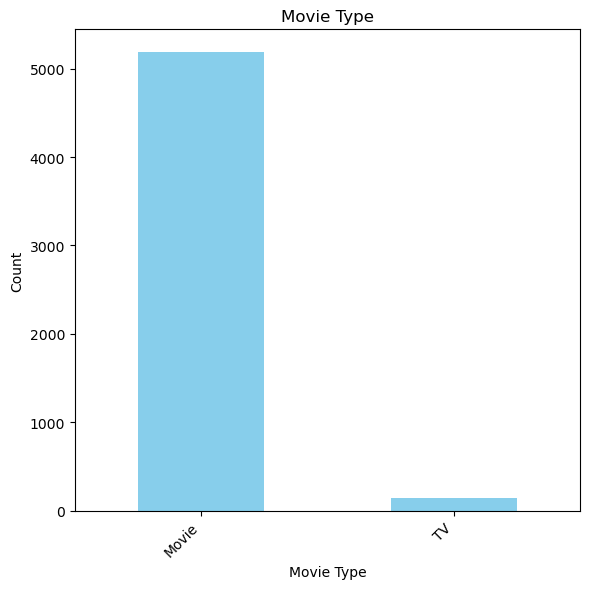

In [15]:
# Extracting the unique components from the 'title' column
unique_components = netflix_df['type'].str.extract(r'(\b\w+\b)')[0]

# Counting the occurrences of each unique component
component_counts = unique_components.value_counts()
print(component_counts)
# Plotting the bar chart
plt.figure(figsize=(6, 6))
component_counts.plot(kind='bar', color='skyblue')
plt.title('Movie Type')
plt.xlabel('Movie Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

### Chart of top 10 countries

country
[United States]                                   1846
[India]                                            875
[United Kingdom]                                   183
[Canada]                                           107
[Spain]                                             91
                                                  ... 
[Uruguay, Guatemala]                                 1
[Romania, Bulgaria, Hungary]                         1
[Philippines, United States]                         1
[India, United Kingdom, Canada, United States]       1
[United Arab Emirates, Jordan]                       1
Name: count, Length: 604, dtype: int64


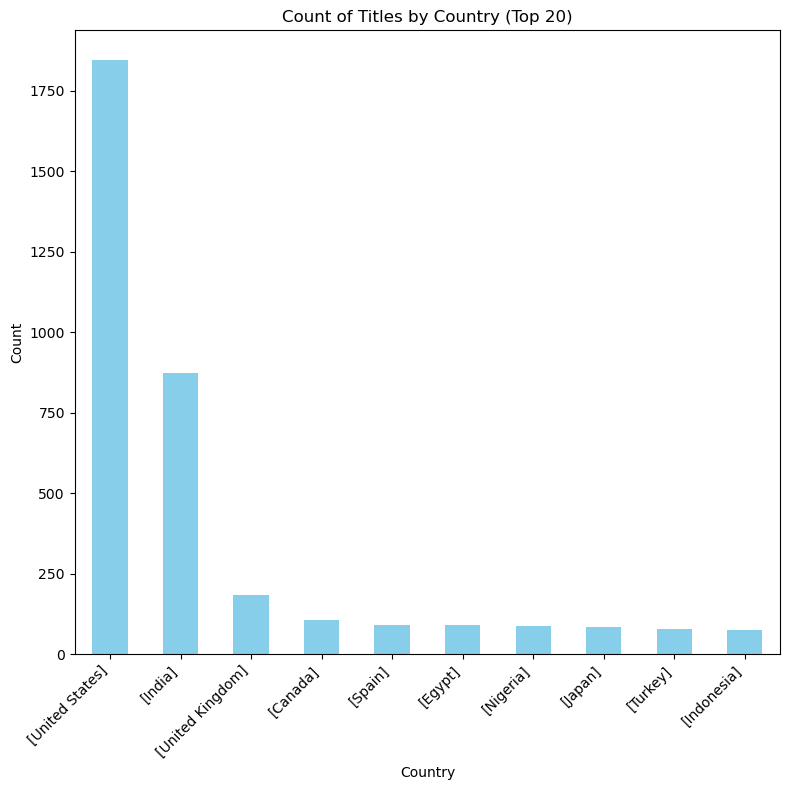

In [16]:
# Counting the occurrences of each unique country
c = netflix_df['country'].value_counts()
print(c)
# Plotting the bar chart
plt.figure(figsize=(8, 8))
c.head(10).plot(kind='bar', color='skyblue')  # Plotting the top 20 countries
plt.title('Count of Titles by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

release_year
2017    657
2018    648
2016    577
2019    519
2020    442
2015    349
2014    242
2013    197
2012    163
2021    161
2010    140
2011    135
2009    112
2008    110
2006     83
Name: count, dtype: int64


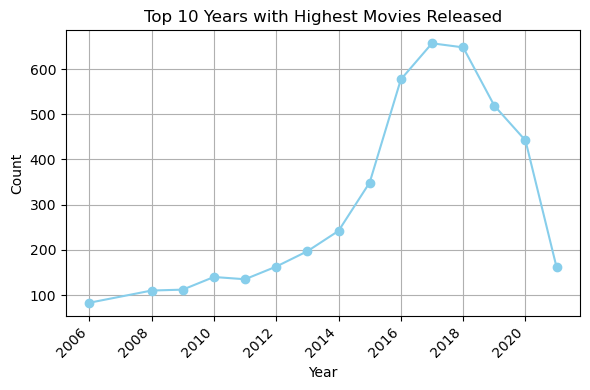

In [17]:
year_counts = netflix_df['release_year'].value_counts().sort_values(ascending=False).head(15)
print(year_counts)
# Plotting the line chart
plt.figure(figsize=(6, 4))
year_counts.sort_index().plot(kind='line', marker='o', color='skyblue')  # Line chart with markers
plt.title('Top 10 Years with Highest Movies Released')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(True)  # Add grid for better visualization of data points
plt.tight_layout()
plt.show()

In [18]:
# Convert 'date_added' column to datetime format
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

# Extract month and year from 'date_added' column
netflix_df['added_month'] = netflix_df['date_added'].dt.month
netflix_df['added_year'] = netflix_df['date_added'].dt.year

In [19]:
# Counting the occurrences of titles added each month and year
added_counts_month = netflix_df['added_month'].value_counts().sort_index()
added_counts_year = netflix_df['added_year'].value_counts().sort_index()

In [20]:
added_counts_month

added_month
1.0     489
2.0     341
3.0     468
4.0     471
5.0     367
6.0     415
7.0     464
8.0     448
9.0     427
10.0    491
11.0    457
12.0    490
Name: count, dtype: int64

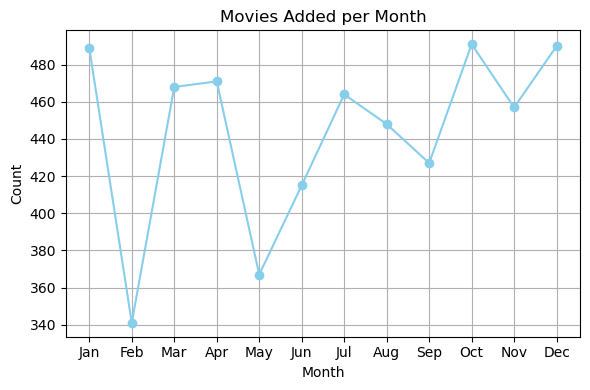

In [21]:
# Plotting the line chart for titles added each month
plt.figure(figsize=(6, 4))
added_counts_month.plot(kind='line', marker='o', color='skyblue') 
plt.title('Movies Added per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)  # Add grid for better visualization of data points
plt.tight_layout()
plt.show()

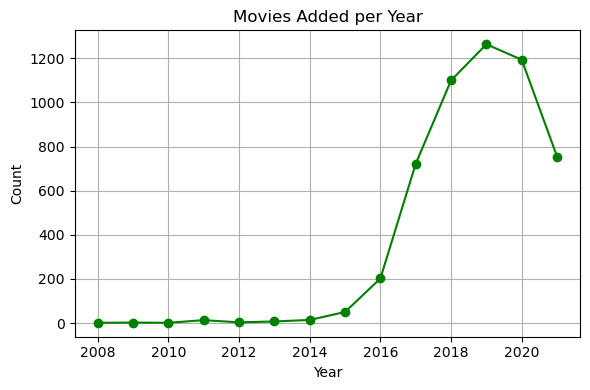

In [22]:
plt.figure(figsize=(6, 4))
added_counts_year.plot(kind='line', marker='o', color='green')  
plt.title('Movies Added per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True) 
plt.tight_layout()
plt.show()

In [23]:
added_counts_year

added_year
2008.0       1
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0       7
2014.0      14
2015.0      50
2016.0     202
2017.0     722
2018.0    1100
2019.0    1264
2020.0    1194
2021.0     755
Name: count, dtype: int64

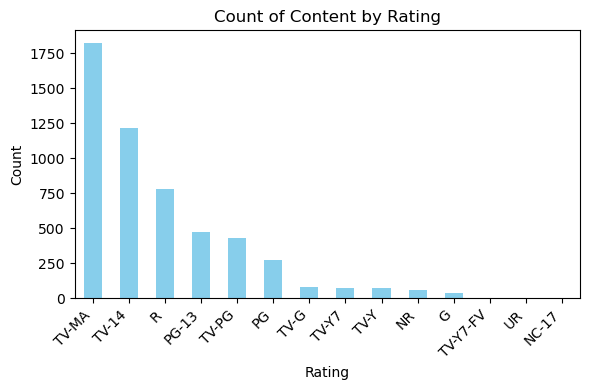

In [24]:
# Counting the occurrences of titles for each rating category
rating_counts = netflix_df['rating'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(6, 4))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Content by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
rating_counts

rating
TV-MA       1822
TV-14       1214
R            778
PG-13        470
TV-PG        431
PG           275
TV-G          84
TV-Y7         76
TV-Y          76
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
Name: count, dtype: int64

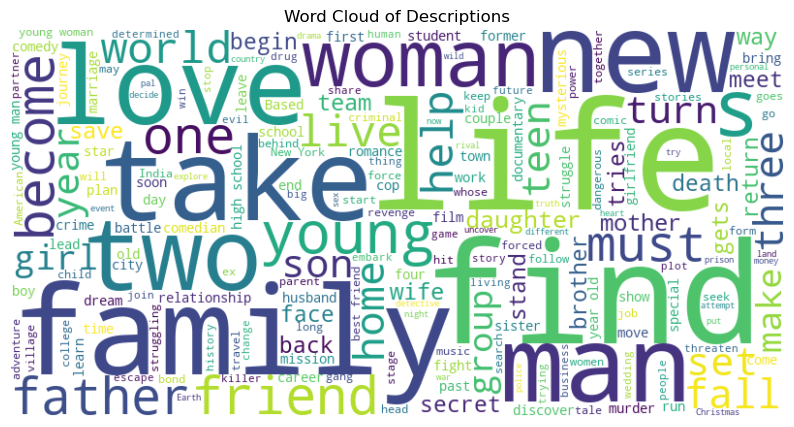

In [26]:
from wordcloud import WordCloud
# Concatenate all descriptions into a single string
descriptions_text = ' '.join(netflix_df['description'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(descriptions_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Descriptions')
plt.axis('off')
plt.show()

# Phase 4: Diagnostic Analytics

- Hypothesis 1: The average duration of Movies and TV Shows on Netflix is significantly different.
- Hypothesis 2: The distribution of release years for Movies and TV Shows on Netflix is uniform.
- Hypothesis 3: There is a significant difference in the number of Movies and TV Shows added each month.
- Hypothesis 4: The average duration of Movies and TV Shows added to Netflix in different years is significantly different.

In [27]:
# Check the data type of the 'country' column
print(netflix_df['country'].dtype)

object


## Hypothesis 1: The average duration of Movies and TV Shows on Netflix is significantly different.

In [28]:
import scipy.stats as stats

movies_duration = netflix_df[netflix_df['type'] == 'Movie']['duration'].str.extract(r'(\d+)')
tv_shows_duration = netflix_df[netflix_df['type'] == 'TV Show']['duration'].str.extract(r'(\d+)')
movies_duration.dropna(inplace=True)
tv_shows_duration.dropna(inplace=True)
movies_duration = movies_duration.astype(int)
tv_shows_duration = tv_shows_duration.astype(int)
t_statistic, p_value = stats.ttest_ind(movies_duration, tv_shows_duration)
alpha = 0.05
print("the t_statistic is ", t_statistic)
print("the value of p_value is", p_value)
if p_value < alpha:
    print("Reject the null hypothesis: The average duration of Movies and TV Shows is significantly different.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average duration of Movies and TV Shows.")

the t_statistic is  [47.06219941]
the value of p_value is [0.]
Reject the null hypothesis: The average duration of Movies and TV Shows is significantly different.


## Hypothesis 2: The distribution of release years for Movies and TV Shows on Netflix is uniform

In [29]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(netflix_df['type'], netflix_df['release_year'])
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
alpha = 0.05
print("the chi2_stat is ", chi2_stat)
print("the value of p_value is", p_value)
if p_value < alpha:
    print("Reject the null hypothesis: The distribution of release years for Movies and TV Shows is not uniform.")
else:
    print("Fail to reject the null hypothesis: The distribution of release years for Movies and TV Shows is uniform.")

the chi2_stat is  104.73140691103278
the value of p_value is 0.00569660546133666
Reject the null hypothesis: The distribution of release years for Movies and TV Shows is not uniform.


## Hypothesis 3: There is a significant difference in the number of Movies and TV Shows added each month.

In [30]:
movies_monthly_counts = netflix_df[netflix_df['type'] == 'Movie']['added_month']
tv_shows_monthly_counts = netflix_df[netflix_df['type'] == 'TV Show']['added_month']
movies_monthly_counts.dropna(inplace=True)
tv_shows_monthly_counts.dropna(inplace=True)
t_statistic, p_value = stats.ttest_ind(movies_monthly_counts, tv_shows_monthly_counts)
alpha = 0.05
print("the t_statistic is ", t_statistic)
print("the value of p_value is", p_value)
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the number of Movies and TV Shows added each month.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the number of Movies and TV Shows added each month.")


the t_statistic is  0.6979028631211827
the value of p_value is 0.48526841032563317
Fail to reject the null hypothesis: There is no significant difference in the number of Movies and TV Shows added each month.


# Phase 5: Predictive Analytics

In [31]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       5332 non-null   object        
 1   type          5332 non-null   object        
 2   title         5332 non-null   object        
 3   director      5332 non-null   object        
 4   cast          5332 non-null   object        
 5   country       5332 non-null   object        
 6   date_added    5328 non-null   datetime64[ns]
 7   release_year  5332 non-null   int64         
 8   rating        5332 non-null   object        
 9   duration      5332 non-null   object        
 10  listed_in     5332 non-null   object        
 11  description   5332 non-null   object        
 12  added_month   5328 non-null   float64       
 13  added_year    5328 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 624.8+ KB


In [32]:
# Define relevant features
features = ['title', 'director', 'cast', 'listed_in', 'description', 'rating', 'country']

# Extract relevant features from the DataFrame
relevant_data = netflix_df[features]


In [33]:
# Define a function to convert lists to strings
def convert_list_to_string(lst):
    if isinstance(lst, list):
        return ', '.join(lst)
    else:
        return str(lst)

# Convert lists to strings before concatenating
netflix_df['combined_features'] = (
    netflix_df['title'].apply(convert_list_to_string) + ' ' + 
    netflix_df['director'].apply(convert_list_to_string) + ' ' + 
    netflix_df['cast'].apply(convert_list_to_string) + ' ' +  
    netflix_df['listed_in'].apply(convert_list_to_string) + ' ' + 
    netflix_df['description'].apply(convert_list_to_string) + ' ' + 
    netflix_df['rating'].apply(convert_list_to_string)
)


### Step 1: Text Vectorization

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

In [35]:
tfidf_matrix = tfidf_vectorizer.fit_transform(netflix_df['combined_features'])

### Step 2: Similarity Calculation

In [36]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [47]:
cosine_sim

array([[1.        , 0.00328291, 0.00176505, ..., 0.0021011 , 0.00195955,
        0.01903704],
       [0.00328291, 1.        , 0.        , ..., 0.        , 0.        ,
        0.00741473],
       [0.00176505, 0.        , 1.        , ..., 0.02619539, 0.02340035,
        0.01518048],
       ...,
       [0.0021011 , 0.        , 0.02619539, ..., 1.        , 0.04043558,
        0.00112899],
       [0.00195955, 0.        , 0.02340035, ..., 0.04043558, 1.        ,
        0.00589715],
       [0.01903704, 0.00741473, 0.01518048, ..., 0.00112899, 0.00589715,
        1.        ]])

### Step 3: Recommendation Generation

In [43]:
def get_recommendations(title, similarity_matrix, data_frame, top_n=10):
    idx = data_frame[data_frame['title'] == title].index[0]
    sim_scores = list(enumerate(similarity_matrix[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    
    top_similar_titles = sim_scores[1:top_n+1]

    
    top_indices = [i[0] for i in top_similar_titles]

   
    return data_frame.iloc[top_indices]['title']

### Step 4: Recommendation Testing

In [44]:
title = "Jeans"

In [45]:
recommendations = get_recommendations(title, cosine_sim, netflix_df)
print("Recommendations for {}: \n{}".format(title, recommendations))

Recommendations for Jeans: 
57                      Naruto Shippûden the Movie: Bonds
56               Naruto Shippuden the Movie: Blood Prison
59                            Naruto Shippuden: The Movie
58           Naruto Shippûden the Movie: The Will of Fire
3541                                               Naruto
7559                      Naruto Shippuden : Blood Prison
63      Naruto the Movie: Ninja Clash in the Land of Snow
60            Naruto Shippuden: The Movie: The Lost Tower
62      Naruto the Movie 3: Guardians of the Crescent ...
7090    InuYasha: The Movie 2: The Castle Beyond the L...
Name: title, dtype: object


### Step 5: Recommend Month

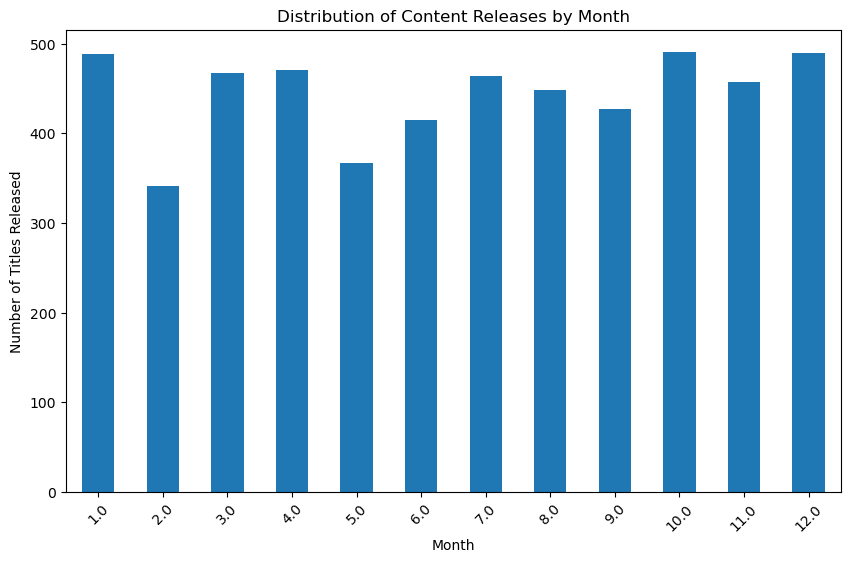

Recommended month(s) to release new content: 10.0


In [46]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])
netflix_df['release_month'] = netflix_df['date_added'].dt.month
monthly_release_counts = netflix_df['release_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
monthly_release_counts.plot(kind='bar')
plt.title('Distribution of Content Releases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles Released')
plt.xticks(rotation=45)
plt.show()


suitable_months = monthly_release_counts.idxmax() 
print("Recommended month(s) to release new content:", suitable_months)
